In [9]:
import numpy as np
import random
import sys, os
import PIL
import matplotlib.pyplot as plt
from utils import *

import torch
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [31]:
#this function will take in the path of the original high_res version, low_res_version, and high_res_version generated
#visualise them on the same scale, get the original resolution from the low_res_version and calculate RRMSE too
rrmse_NN = []
rrmse_BILIN = []
rrmse_BICUBIC = []
rrmse_SRGAN = []
def analyse_output(high_res_path, low_res_path, high_fake_path):
    i_orig = PIL.Image.open(high_res_path)
    w_high, h_high = i_orig.size
    i_low = PIL.Image.open(low_res_path)
    i_high_fake = PIL.Image.open(high_fake_path)
    
    #now first generating low res to high res using standard algos
    i_low2high_NN = i_low.resize((w_high, h_high), PIL.Image.NEAREST)
    i_low2high_BILIN = i_low.resize((w_high, h_high), PIL.Image.BILINEAR)
    i_low2high_BICUBIC = i_low.resize((w_high, h_high), PIL.Image.BICUBIC)
    
    #plotting all the version on same resolution, note that even while plotting there might
    #be some internal resizing of the images would be happening...
    plt.figure()
    plt.title('original')
    plt.imshow(np.array(i_orig))
    plt.figure()
    plt.title('Nearest neighbor')
    plt.imshow(np.array(i_low2high_NN))
    plt.figure()
    plt.title('Bilnear')
    plt.imshow(np.array(i_low2high_BILIN))
    plt.figure()
    plt.title('Bicubic')
    plt.imshow(np.array(i_low2high_BICUBIC))
    
    plt.figure()
    plt.title('SRGAN')
    plt.imshow(np.array(i_high_fake))
    
    
    
    
    print('RRMSE val between original high and low2high_NN : {}'.format(RRMSE(np.array(i_orig), np.array(i_low2high_NN))))
    rrmse_NN.append(RRMSE(np.array(i_orig), np.array(i_low2high_NN)))
    print('RRMSE val between original high and low2high_BILIN : {}'.format(RRMSE(np.array(i_orig), np.array(i_low2high_BILIN))))
    rrmse_BILIN.append(RRMSE(np.array(i_orig), np.array(i_low2high_BILIN)))
    print('RRMSE val between original high and low2high_BICUBIC : {}'.format(RRMSE(np.array(i_orig), np.array(i_low2high_BICUBIC))))
    rrmse_BICUBIC.append(RRMSE(np.array(i_orig), np.array(i_low2high_BICUBIC)))
    print('\n')
    print('RRMSE val between original high and low2high_SRGAN : {}'.format(RRMSE(np.array(i_orig), np.array(i_high_fake))))
    rrmse_SRGAN.append(RRMSE(np.array(i_orig), np.array(i_high_fake)))

RRMSE val between original high and low2high_NN : 0.7611567592294268
RRMSE val between original high and low2high_BILIN : 0.7748119709433293
RRMSE val between original high and low2high_BICUBIC : 0.7628321168756662


RRMSE val between original high and low2high_SRGAN : 0.6941164423596694


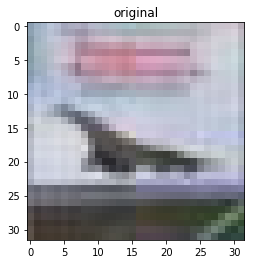

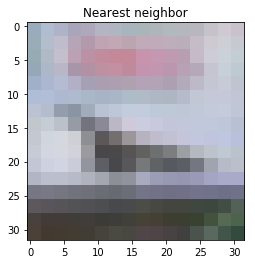

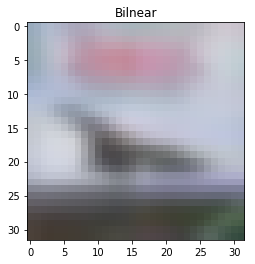

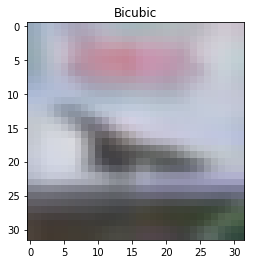

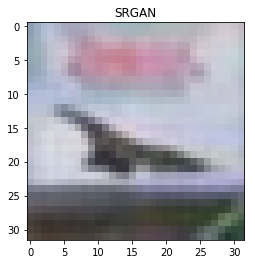

In [29]:
analyse_output('../output_images/udion_output/high_res_real/0.png', '../output_images/udion_output/low_res/0.png', '../output_images/udion_output/high_res_fake/0.png')

RRMSE val between original high and low2high_NN : 0.7611567592294268
RRMSE val between original high and low2high_BILIN : 0.7748119709433293
RRMSE val between original high and low2high_BICUBIC : 0.7628321168756662


RRMSE val between original high and low2high_SRGAN : 0.6941164423596694
<<<<=========================================================================>
RRMSE val between original high and low2high_NN : 0.6696219314171022
RRMSE val between original high and low2high_BILIN : 0.6763268247132325
RRMSE val between original high and low2high_BICUBIC : 0.6546703530087323


RRMSE val between original high and low2high_SRGAN : 0.5418055688570664
<<<<=========================================================================>
RRMSE val between original high and low2high_NN : 0.8815178935155855
RRMSE val between original high and low2high_BILIN : 0.8730880825000358
RRMSE val between original high and low2high_BICUBIC : 0.8250201772141189


RRMSE val between original high and low2high_SR

/home/udion/anaconda3/envs/DeepCV3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


RRMSE val between original high and low2high_NN : 0.6433886582343011
RRMSE val between original high and low2high_BILIN : 0.6497389663017246
RRMSE val between original high and low2high_BICUBIC : 0.637833180129413


RRMSE val between original high and low2high_SRGAN : 0.5750363028411092
<<<<=========================================================================>
RRMSE val between original high and low2high_NN : 0.5036733219178203
RRMSE val between original high and low2high_BILIN : 0.5200727300080271
RRMSE val between original high and low2high_BICUBIC : 0.4965793478263116


RRMSE val between original high and low2high_SRGAN : 0.44386620074375305
<<<<=========================================================================>
RRMSE val between original high and low2high_NN : 0.3967046190892421
RRMSE val between original high and low2high_BILIN : 0.3975861483243056
RRMSE val between original high and low2high_BICUBIC : 0.39086164027079


RRMSE val between original high and low2high_SRGA

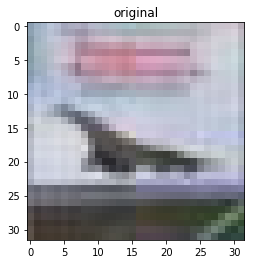

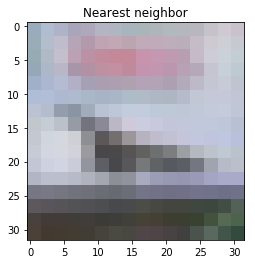

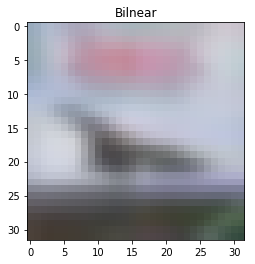

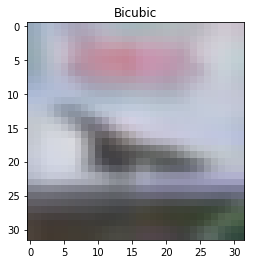

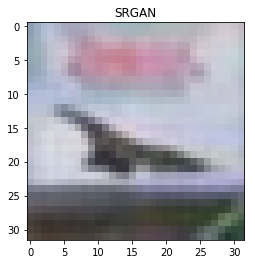

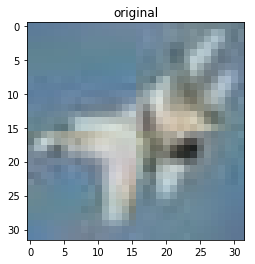

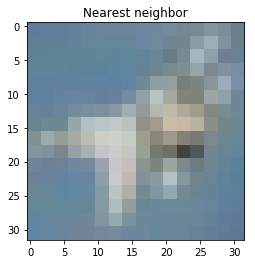

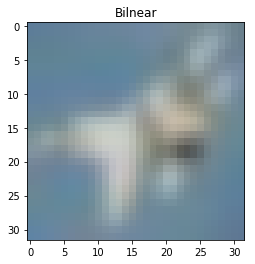

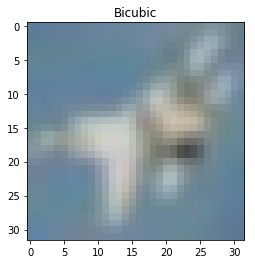

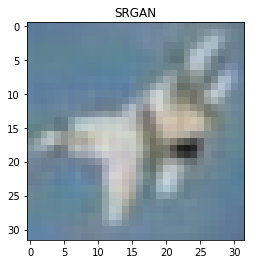

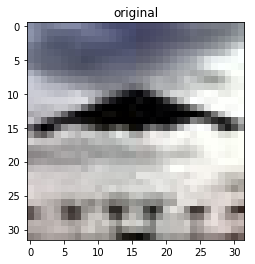

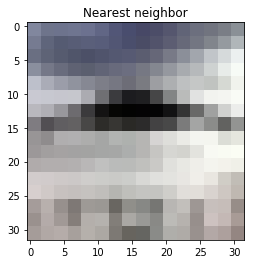

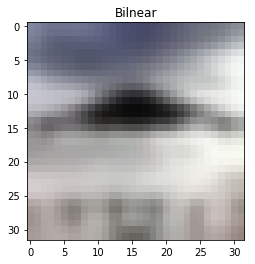

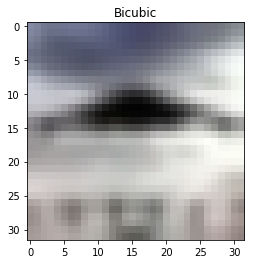

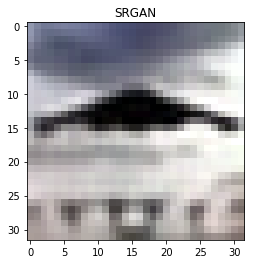

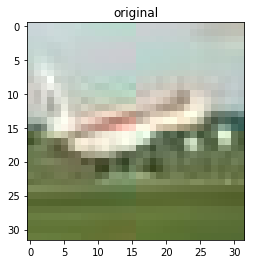

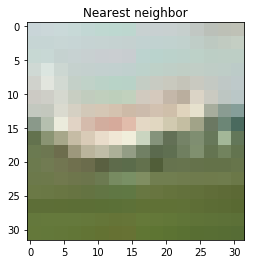

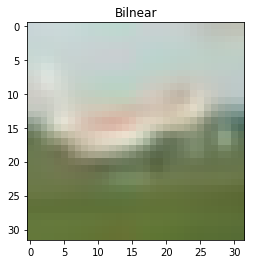

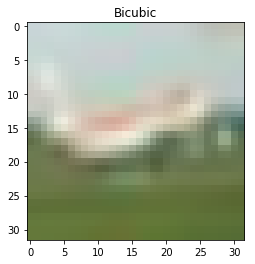

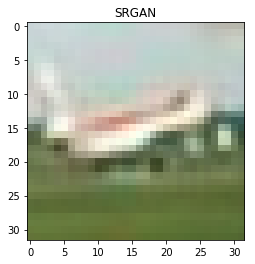

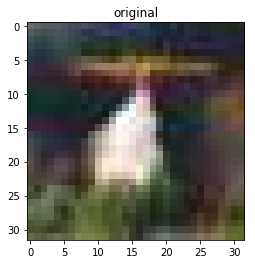

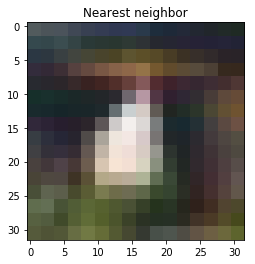

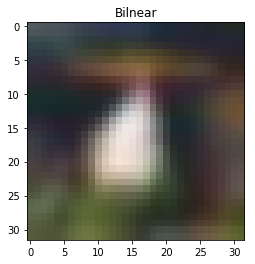

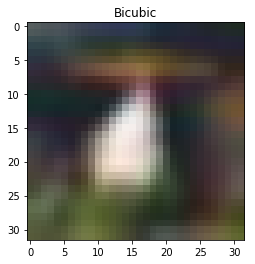

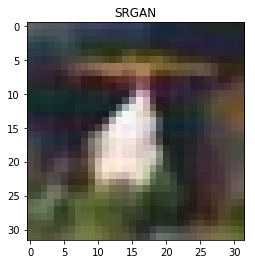

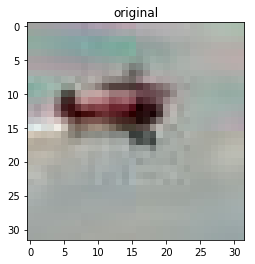

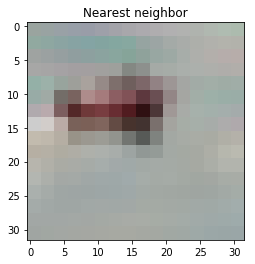

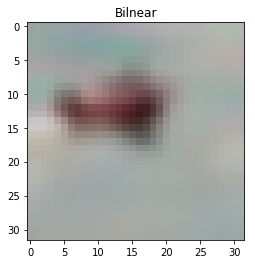

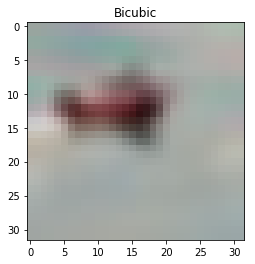

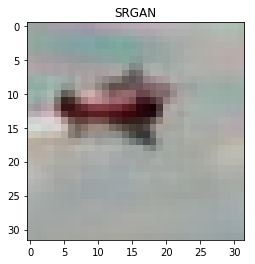

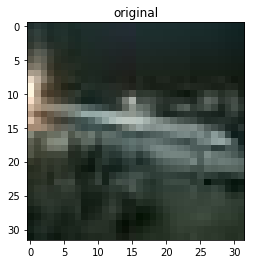

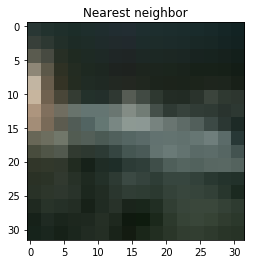

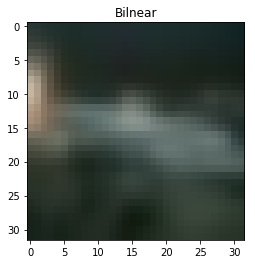

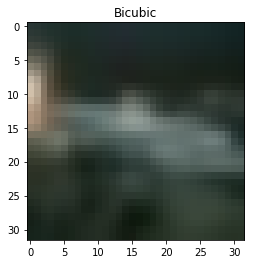

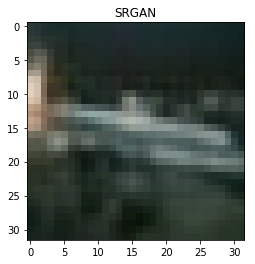

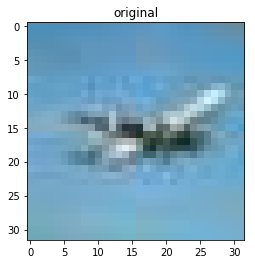

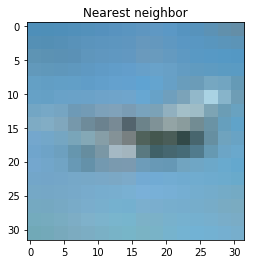

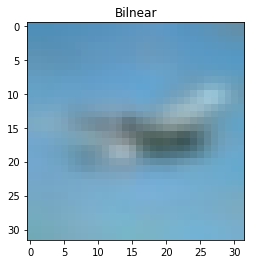

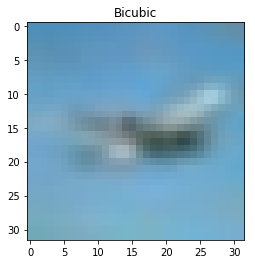

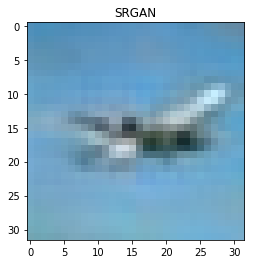

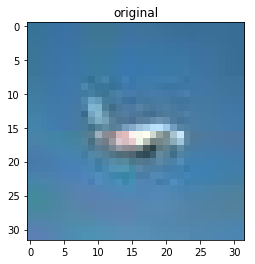

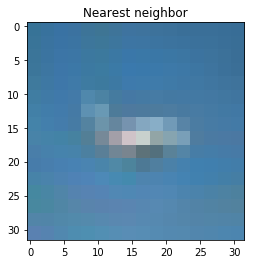

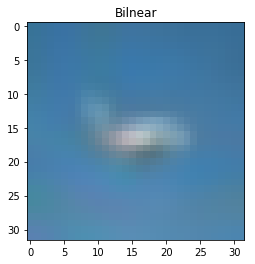

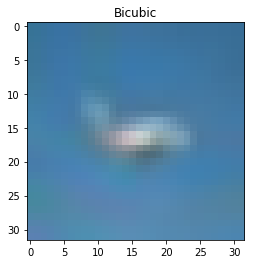

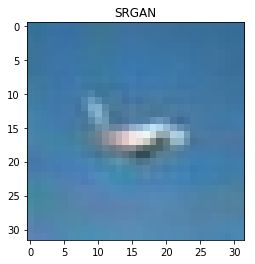

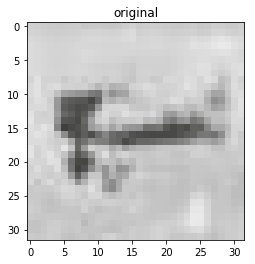

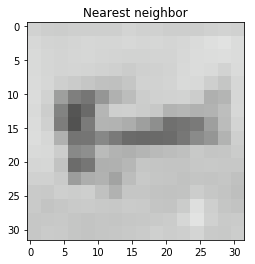

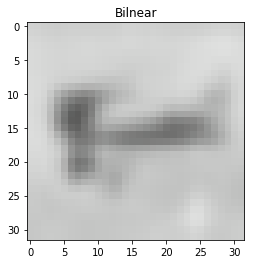

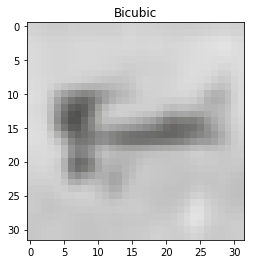

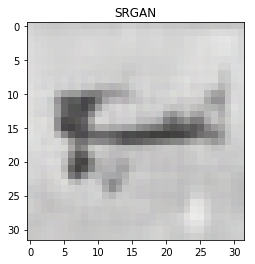

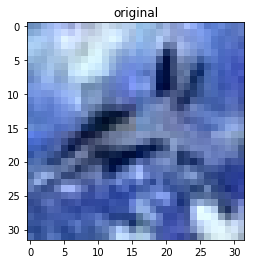

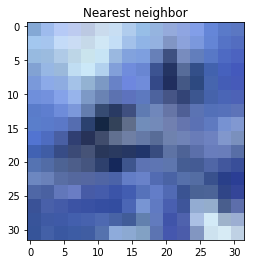

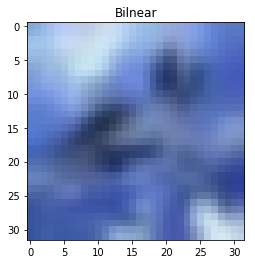

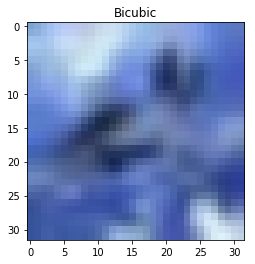

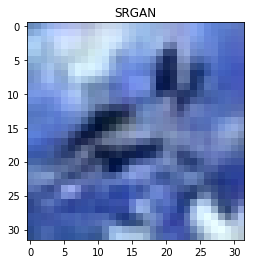

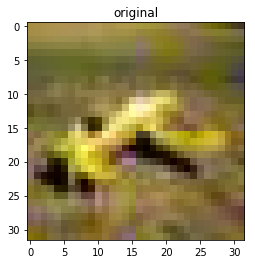

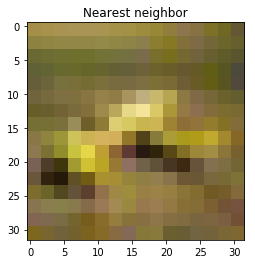

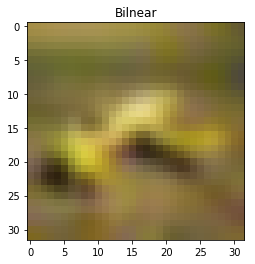

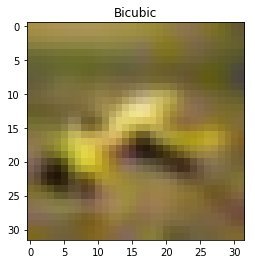

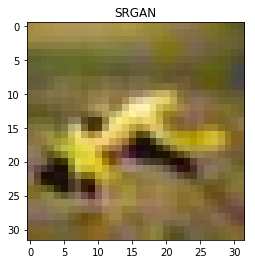

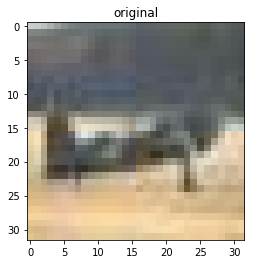

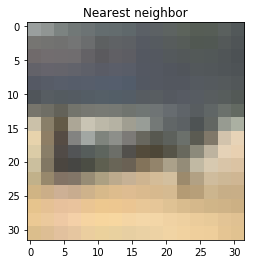

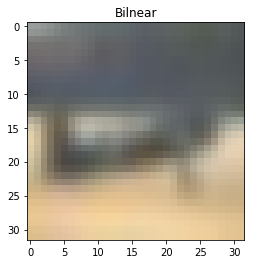

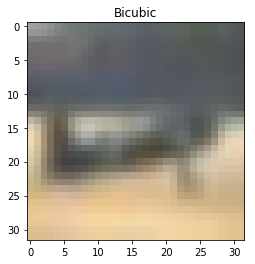

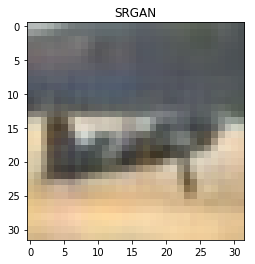

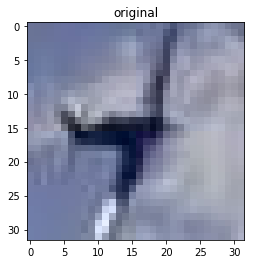

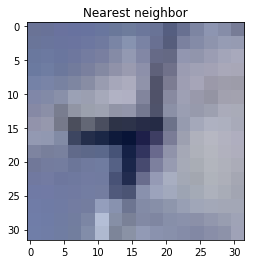

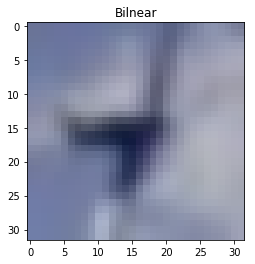

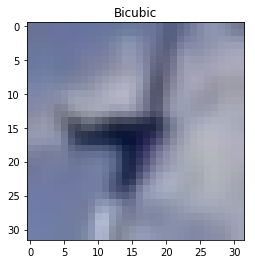

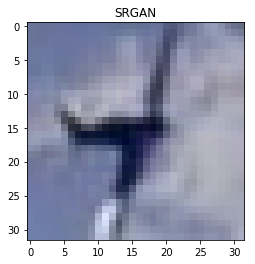

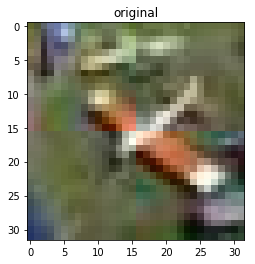

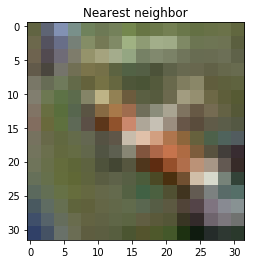

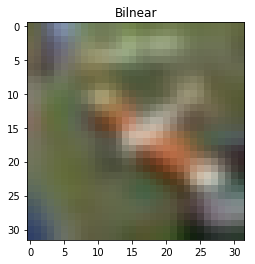

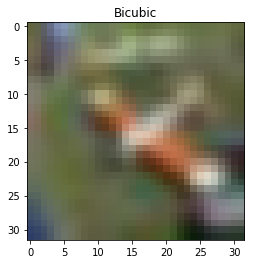

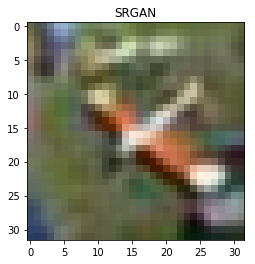

In [32]:
# getting results for more images
for i in range(15):
    analyse_output('../output_images/udion_output/high_res_real/{}.png'.format(i),
                   '../output_images/udion_output/low_res/{}.png'.format(i),
                   '../output_images/udion_output/high_res_fake/{}.png'.format(i))
    print('<<<<=========================================================================>')

In [56]:
#plotting RRMSE for comparison
def plot_rrmse(rrmse_NN, rrmse_BILIN, rrmse_BICUBIC, rrmse_SRGAN):
    x = np.array([i for i in range(15)])
    plt.figure(figsize=(25,8))
    ax = plt.subplot(111)
    
    ax.bar(x-0.4, rrmse_NN, width=0.2,color='b',align='center')
    ax.bar(x-0.2, rrmse_BILIN, width=0.2,color='g',align='center')
    ax.bar(x, rrmse_BICUBIC, width=0.2,color='orange',align='center')
    ax.bar(x+0.2, rrmse_SRGAN,width=0.2,color='r',align='center')
    plt.title('RRMSE values with different algos (NN/BILIN/BICUBIC/SRGAN)')
    plt.xlabel('index of images')
    plt.ylabel('RRMSE')
    plt.show()

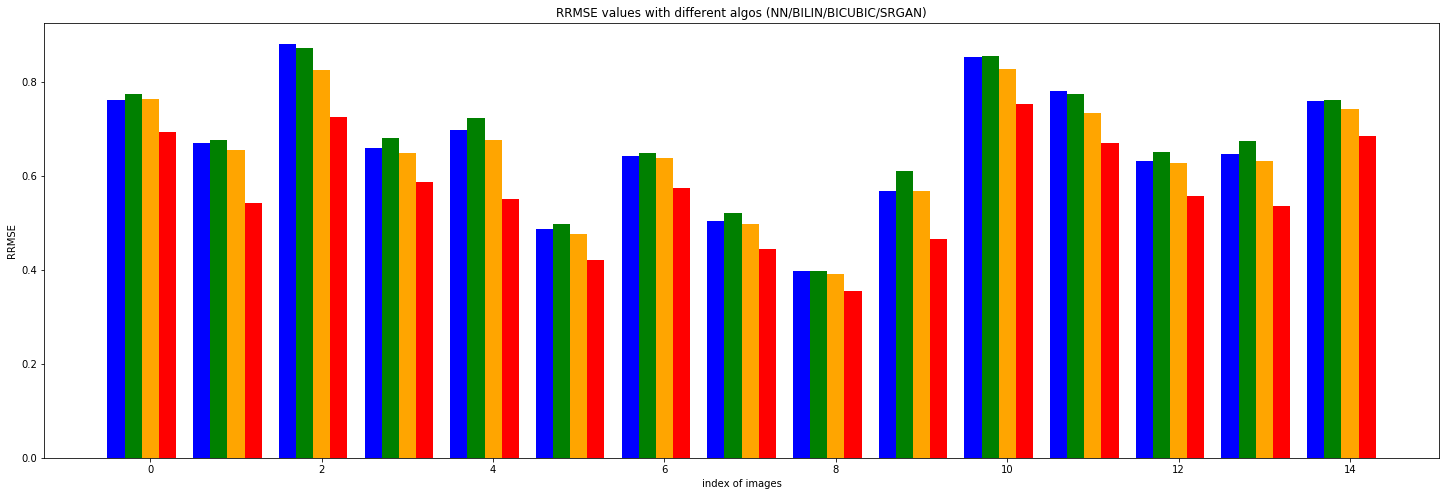

In [57]:
plot_rrmse(rrmse_NN, rrmse_BILIN, rrmse_BICUBIC, rrmse_SRGAN)